In [1]:
import sys
sys.path.append('/home/jessica/reading-kiln-termostat/src')
import InputReader
import TesseractPipeline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pytesseract


In [2]:
# Upgrade função leitura para recriar pasta com mesmo nome
# Caminho relativo vs absoluto 
# Rodar read_video primeiras queimas 
# template matching 

In [3]:
test_color = "/home/jessica/reading-kiln-termostat/notebooks/kiln-images/color-images/0_500.jpg"
test_pb = "/home/jessica/reading-kiln-termostat/notebooks/kiln-images/color-images/12_4000.jpg"

image_color = cv2.imread(test_color, cv2.IMREAD_GRAYSCALE)
image_pb = cv2.imread(test_pb, cv2.IMREAD_GRAYSCALE)

In [4]:
#Verificar psm para diferentes valores pb
# Verificar pcm pb sem corte

#display superior
image_pb = image_pb[510:600, 800:1100]

#display inferior


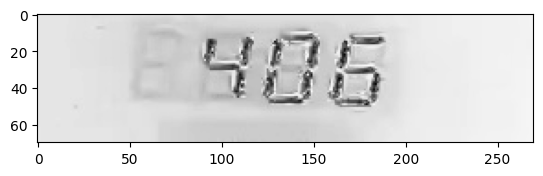

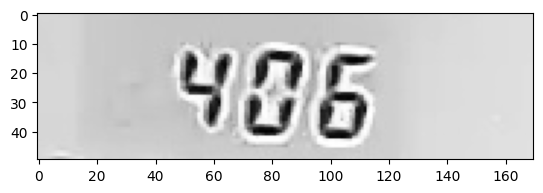

In [5]:
display_sup = image_color[530:600, 830:1100]
display_inf = image_color[590:640, 880:1050] 
plt.imshow(display_sup, cmap = 'Greys')
plt.show()

plt.imshow(display_inf, cmap = 'Greys')
plt.show()

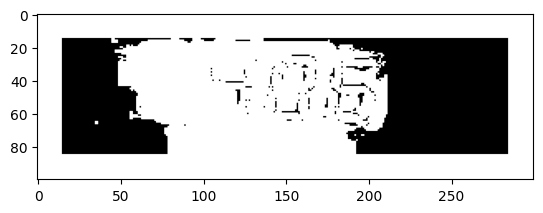

In [6]:
msk = cv2.inRange(display_sup, np.array([0]), np.array([70]))
bord = cv2.copyMakeBorder(src=msk, top=15, bottom=15, left=15, right=15, borderType=cv2.BORDER_CONSTANT) 
plt.imshow(bord, cmap = 'Greys')
plt.show()

In [7]:
possible_configs = ["--psm 3 -c tessedit_char_whitelist=i0123456789",
                    "--psm 4 -c tessedit_char_whitelist=i0123456789",
                    "--psm 5 -c tessedit_char_whitelist=i0123456789",
                    "--psm 6 -c tessedit_char_whitelist=i0123456789",
                    "--psm 7 -c tessedit_char_whitelist=i0123456789",
                    "--psm 3",
                    "--psm 4",
                    "--psm 5",
                    "--psm 7",
                    "--psm 6",
                   "--psm 13",
                   "--psm 8"]

for config in possible_configs:
        print("config: ")
        print(config)
        print(pytessepsract.image_to_string(msk, config=config))

config: 
--psm 3 -c tessedit_char_whitelist=i0123456789

config: 
--psm 4 -c tessedit_char_whitelist=i0123456789

config: 
--psm 5 -c tessedit_char_whitelist=i0123456789

config: 
--psm 6 -c tessedit_char_whitelist=i0123456789

config: 
--psm 7 -c tessedit_char_whitelist=i0123456789

config: 
--psm 3

config: 
--psm 4

config: 
--psm 5

config: 
--psm 7

config: 
--psm 6

config: 
--psm 13
a

config: 
--psm 8
a



In [58]:
tesseract_pipeline.perform_recognition("/home/jessica/reading-kiln-termostat/notebooks/kiln-images/color-images/0_500.jpg",
                                        configs = possible_configs)

NameError: name 'tesseract_pipeline' is not defined

In [59]:
# Colorida em preto e branco
# BGR pra HSV
# Filtro para contrastes 


In [135]:
msk = cv2.inRange(display_inf, np.array([250, 250, 250]), np.array([255, 255, 255]))
# msk = cv2.inRange(image, np.array([0, 0, 175]), np.array([179, 255, 255]))
# blur = cv2.GaussianBlur(msk,(5,5),10)
plt.imshow(msk)
plt.show()

error: OpenCV(4.8.0) /io/opencv/modules/core/src/arithm.cpp:1741: error: (-209:Sizes of input arguments do not match) The lower boundary is neither an array of the same size and same type as src, nor a scalar in function 'inRange'


In [115]:
for config in possible_configs:
        print("config: ")
        print(config)
        print(pytesseract.image_to_string(display_inf, config=config))

config: 
--psm 3 -c tessedit_char_whitelist=0123456789

config: 
--psm 4 -c tessedit_char_whitelist=0123456789

config: 
--psm 5 -c tessedit_char_whitelist=0123456789

config: 
--psm 6 -c tessedit_char_whitelist=0123456789

config: 
--psm 7 -c tessedit_char_whitelist=0123456789

config: 
--psm 3

config: 
--psm 4
HHS

config: 
--psm 5
mk.)
&
=

config: 
--psm 7
“BG

config: 
--psm 6
CaS

config: 
--psm 13
Wes

config: 
--psm 8
Wes



In [ ]:
for file in os.listdir("different_tests/"):
    perform_recognition_tesseract("different_tests/" + file,
                                 configs = possible_configs)

In [ ]:
Testes:
    
1) Display verde e vermelho no preto e branco, ver se reconhece
2) Verificar como extrair o preto vs azul  

In [ ]:
perform_recognition_tesseract("different_tests/" + file,
                                 configs = possible_configs)

In [18]:
gray

array([[72, 72, 72, ..., 63, 73, 78],
       [72, 72, 72, ..., 49, 57, 61],
       [73, 73, 72, ..., 45, 45, 46],
       ...,
       [86, 86, 84, ..., 37, 37, 36],
       [87, 87, 87, ..., 37, 37, 36],
       [87, 87, 87, ..., 36, 36, 36]], dtype=uint8)

In [17]:
image = cv2.imread("/home/jessica/reading-kiln-termostat/notebooks/different_tests/all-strings-day.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray)

error: OpenCV(4.8.0) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [ ]:
image = imutils.resize(image, height=500)
blurred = cv2.medianBlur(image,3)
edged = cv2.Canny(gray, 50, 200, 255)

In [15]:
def show_image(image):
    cv2.imshow('image',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
show_image(gray)

In [ ]:
show_image(blurred0)

In [ ]:
show_image(edged)

In [ ]:
warped = four_point_transform(gray, displayCnt.reshape(4, 2))
output = four_point_transform(image, displayCnt.reshape(4, 2))

In [ ]:
show_image(output)

In [ ]:
print(pytesseract.image_to_string(Image.open("test2.png")))


In [ ]:
print(pytesseract.image_to_string(Image.open("all-strings-day.png")))


In [ ]:
print(pytesseract.image_to_string(Image.open("close-up-display-letters-day.png")))


In [ ]:
print(pytesseract.image_to_string(Image.open("framed-picture-day.png")))


In [ ]:
print(pytesseract.image_to_string(Image.open("green-display-day.png")))


In [ ]:
print(pytesseract.image_to_string(Image.open("red-display-day.png")))


In [ ]:
print(pytesseract.image_to_string(Image.open("both-displays-day.png"), config="--psm 6 -c tessedit_char_whitelist=0123456789"))


In [ ]:
print(pytesseract.image_to_string(Image.open("both-displays-night.png"), config=" --psm 6 -c tessedit_char_whitelist=0123456789"))


In [ ]:
print(pytesseract.image_to_string(Image.open("green-display-night.png"), config=" --psm 6 -c tessedit_char_whitelist=0123456789"))
    